<img src="wwi.jpg"  >
<h1> War World I</h1>



In [169]:
import pandas as pd
from pandas import *
from seaborn import *
from matplotlib.pyplot import *
from datetime import date
import numpy as np
from statsmodels.formula.api import *
%matplotlib inline
plt.style.use('ggplot')
import matplotlib.pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
import nltk

np.set_printoptions(threshold=np.inf)

In [170]:
#Loading the data
war = pd.read_csv('thor_vbo_new.csv')

C:\Users\Felipe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,13,18,19,20,22,26,29,30,32,35,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### What was the most TGT type used during the War?

In [171]:
tgttype = war.groupby('TGTTYPE').size()
most_tgttype = tgttype.sort_values(ascending=False)
most_tgttype.head(20)

TGTTYPE
AREA\DEPOT              170757
TROOPS                   87625
UNKNOWN\UNIDENTIFIED     52722
BUILDINGS                42045
MOTOR VEHICLE            38256
ROAD                     33399
ANTI-AIRCRAFT            26583
TRUCK PARK\STOP          26386
CAMP                     19692
BRIDGE                   15237
CONFIRM ENEMY LOC        13385
BASE                     10663
WATER VEHICLES            9420
SEGMENT\TRANS ROUTE       8655
RADAR                     8047
PERSONNEL\ANY             5340
TRUCKS                    4869
NO TARGET ACQUIRED        4587
FORD                      4579
INTERDICTION POINT        3811
dtype: int64

### What was the aircraft used to fly in the aircraft mission?

In [172]:
aircraft_mission = war['VALID_AIRCRAFT_ROOT'].value_counts()
aircraft_mission.head(20)

F-4       217277
F-100     107816
A-4        87088
A-1        81020
RF-4       71008
A-37       61571
A-7        42105
UH-1       33483
A-6        33211
F-105      31666
RF-101     19229
B-57       19189
AC-119     18005
F-8        17703
AC-47      17299
AC-130     17101
EC-47      15901
O-1        11349
T-28        9267
F-5         9174
Name: VALID_AIRCRAFT_ROOT, dtype: int64

### What was weapon most used during the war?
It's possible see that the most kind of weapon used was Bomb! 

In [173]:
weaponTypeDestroyed= dfResultWeapons['DESTROYED']
weaponTypeDestroyed.sort_values(ascending=False).head(10)

WEAPONTYPE
MK81 GP BOMB (250)        700
MK 82 GP BOMB (500) LD    352
BLU32B FIRE BOMB (500)    322
20 MM AMMO (HNDRDS)       246
BLU27 FIRE BOMB (750)     197
LAU3/MA RKT LCHR (19)     161
CBU24 AN PR/MT (BLU26)    103
7.62 AMMO                  75
M117 GP BOMB (750) LD      59
MK-20 AN TANK/MTL          49
dtype: int64

In [174]:
#Groupby created in order to make easy the understood 
dfResultCountry = war.groupby(['RESULTSBDA', 'TGTCOUNTRY']).size()
dfResultType = war.groupby(['RESULTSBDA','TGTTYPE']).size()
dfResultFuncGB = war.groupby(['RESULTSBDA', 'MFUNC_DESC']).size()
dfResultWeapons = war.groupby(['RESULTSBDA', 'WEAPONTYPE']).size()

### What kind of service was most destroyed during the war?

In [175]:
mFuncDescDestroyed = dfResultFuncGB['DESTROYED'].sort_values(ascending=False).head(10)
mFuncDescDestroyed

MFUNC_DESC
CLOSE AIR SUPPORT       6671
STRIKE                  1626
AIR INTERDICTION        1293
ARMED RECCE              534
TARCON                    39
DIRECT AIR SUPPORT        32
FLAK SUPPRESSION          20
ARMED HELICOPTER          11
FRIENDLY A/C DAM GND       6
MIG CMBT AIR PATROL        3
dtype: int64

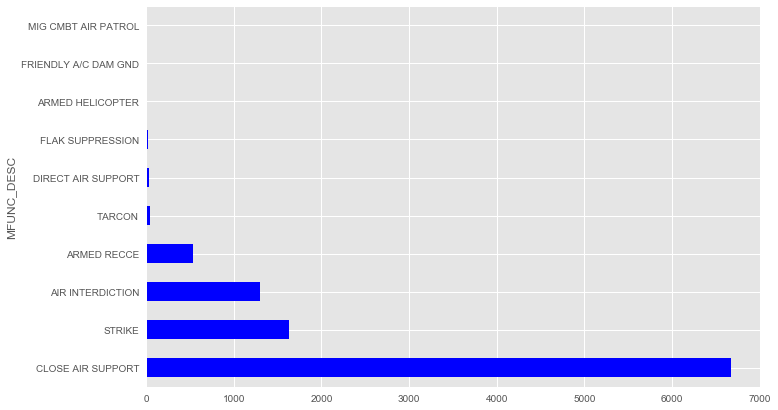

In [176]:
mFuncDescDestroyed.plot(kind='barh', figsize=(11,7), color='blue');

### Where took off the aircraft of the War? 

In [177]:
countrys_mission = war['COUNTRYFLYINGMISSION'].value_counts()
countrys_mission

UNITED STATES OF AMERICA    890754
VIETNAM (SOUTH)             141025
LAOS                          7510
KOREA (SOUTH)                 5541
AUSTRALIA                     2871
Name: COUNTRYFLYINGMISSION, dtype: int64

In [178]:
#dfResultFunc = war[['RESULTSBDA', 'MFUNC_DESC','WEAPONTYPE', 'TGTTYPE', 'TGTCOUNTRY']]
#dfnew = pd.DataFrame(data=dfResultFunc)
#dfnew[dfnew.RESULTSBDA == 'DESTROYED'].set_index('RESULTSBDA').sort_values('MFUNC_DESC')

### What was TGT most destroyed during the War?

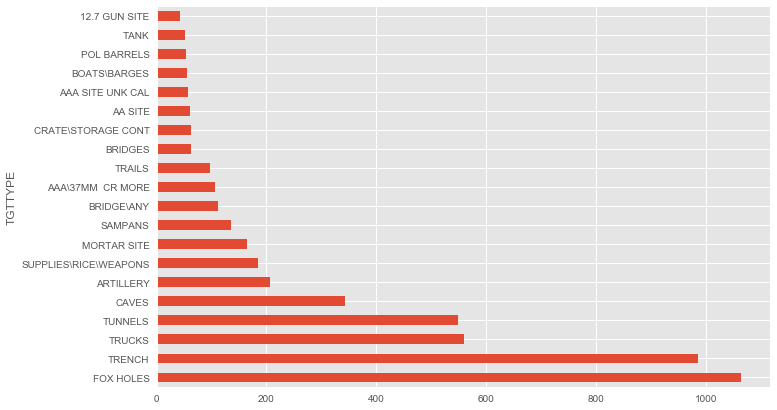

In [179]:
tgtTypesDestroyed= dfResultType['DESTROYED'].sort_values(ascending=False).head(20)
tgtTypesDestroyed.plot(kind='barh', figsize=(11,7));

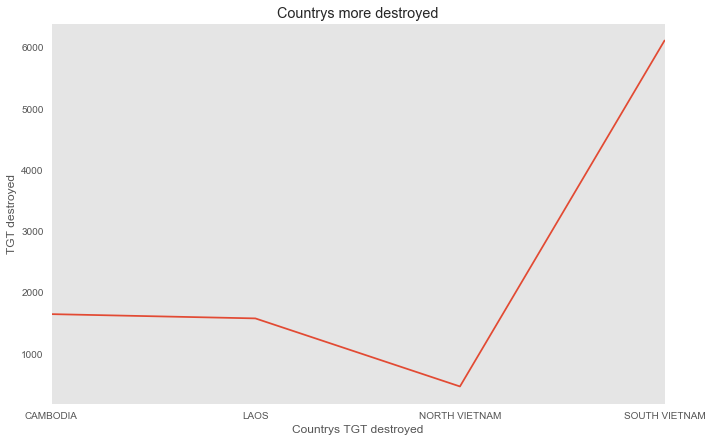

In [180]:
countrysDestroyed = dfResultCountry['DESTROYED']
countrysDestroyed.plot(grid=False, figsize=(11,7));
plt.title("Countrys more destroyed");
plt.xlabel("Countrys TGT destroyed");
plt.ylabel("TGT destroyed");

# Data related with dates during the War 

In [181]:
DateWar = war[['RESULTSBDA', 'MSNDATE']]
dfResul = DateWar.groupby(['RESULTSBDA']).size().sort_values(ascending = False)

In [182]:
# ETL = Processing of the data. Transformation of the data
# columns with NAN data
war['MSNDATE'].fillna(war['MSNDATE'].mode()[0], inplace=True)

In [183]:
dfDateWar = pd.DataFrame(data=war)

In [184]:
# Processing of the date, extracting and changing to type datetime 
newdate = pd.to_datetime(dfDateWar['MSNDATE'])
dfnewdate = pd.DataFrame(data=newdate)
df = dfnewdate['MSNDATE']
ano = []
mes = []
for i in df:
  
    ano.append(int(i.year)) 
    mes.append(int(i.month))
    
data = {
    'YEAR' : ano,    
    'MONTH': mes
}

In [185]:
# Adding two columns in the main Data Frame
dfDateWar['YEAR'] = ano 
dfDateWar['MONTH'] = mes

In [186]:
### Some results during the War by years

In [187]:
# filtering for kinds of results and grouping by year 
groupDestr = dfDateWar[(dfDateWar['RESULTSBDA'] =='DESTROYED')]
groupKilled = dfDateWar[dfDateWar['RESULTSBDA'] =='KILLED BY AIR']
groupDamaged = dfDateWar[dfDateWar['RESULTSBDA'] =='DAMAGED']
gpk = groupKilled.groupby(['YEAR']).size()
gpD = groupDestr.groupby(['YEAR']).size()
gpDam = groupDamaged.groupby(['YEAR']).size()

In [188]:
# Creating new series to the new Data Frame 
newDfGr = {
    'KILLED BY AIR' : gpk,
    'DESTROYED' : gpD,
    'DAMAGED' : gpDam
}
dfFi = pd.DataFrame(newDfGr)

In [189]:
dfFi

,DAMAGED,DESTROYED,KILLED BY AIR
YEAR,,,
1970,1401.0,2733,116.0
1971,1626.0,2891,156.0
1972,1483.0,3603,208.0
1973,406.0,1030,122.0
1975,NaN,1,NaN


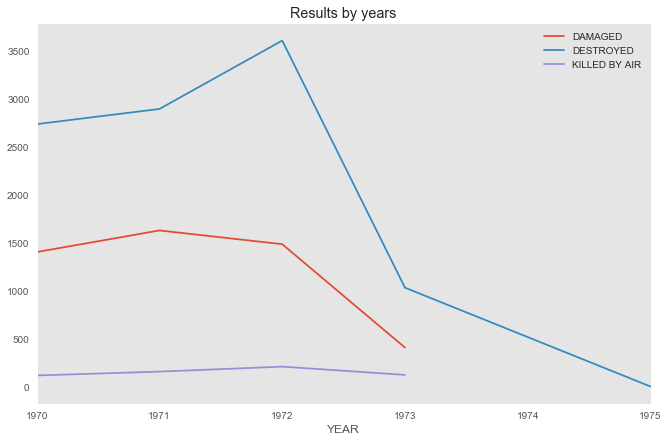

In [190]:
dfFi.plot(grid=False, figsize=(11,7), title="Results by years");